<a href="https://colab.research.google.com/github/f8sle/report/blob/main/10%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
samples = 1000

x1 = np.random.uniform( 0, 1, samples)
x2 = np.random.uniform( 0, 1, samples)

Input = np.column_stack((x1, x2))

y = 2 * x1 + 3 * x2 - 1

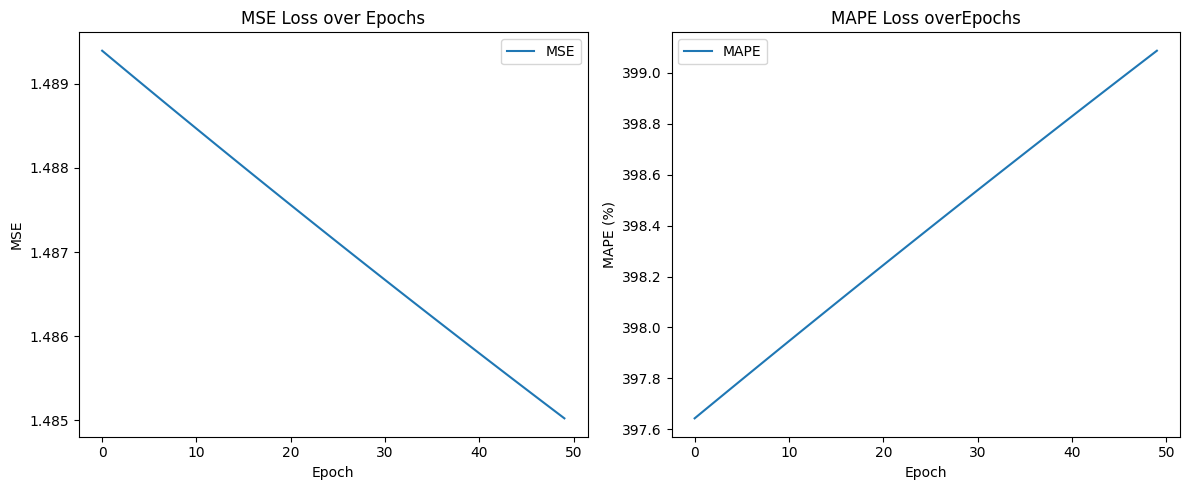

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시드 설정 및 데이터 생성
np.random.seed(0)
samples = 1000

x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

Input = np.column_stack((x1, x2))

y = 2 * x1 + 3 * x2 - 1

# Sigmoid 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# MSE 비용 함수
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# MAPE 비용 함수
def mape_loss(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100  # 0 나누기 방지

# 모델 파라미터 초기화
np.random.seed(0)
weights = np.random.randn(2)
bias = np.random.randn(1)
learning_rate = 0.01
epochs = 50

# 손실 기록
mse_history = []
mape_history = []

# 학습 루프
for epoch in range(epochs):
    # 순전파
    z = np.dot(Input, weights) + bias
    y_pred = sigmoid(z)

    # 손실 계산
    mse = mse_loss(y, y_pred)
    mape = mape_loss(y, y_pred)

    mse_history.append(mse)
    mape_history.append(mape)

    # 역전파 (Sigmoid 미분 포함)
    error = y_pred - y
    sigmoid_derivative = y_pred * (1 - y_pred)
    grad = error * sigmoid_derivative

    # 기울기 계산
    weight_grad = np.dot(Input.T, grad) / samples
    bias_grad = np.mean(grad)

    # 파라미터 업데이트
    weights -= learning_rate * weight_grad
    bias -= learning_rate * bias_grad

# 손실 그래프 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mse_history, label='MSE')
plt.title('MSE Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mape_history, label='MAPE')
plt.title('MAPE Loss overEpochs')
plt.xlabel('Epoch')
plt.ylabel('MAPE (%)')
plt.legend()

plt.tight_layout()
plt.show()